# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

###Problem Overview
In this problem, the goal is to analyze historical data from a bank to determine whether a customer is likely to sign up for a deposit program. This is a binary classification problem, where the target variable will be something like "Subscribed" (1/0), and the features (input variables) will be characteristics of the customers.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer


In [9]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [11]:
# Find the number of null values in each column
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
# Check for outliers.
# Data looks pretty fine.

df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [14]:

df.shape

(41188, 21)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [15]:
# Maximise Y count.
# Analyse and give business recommendations to target the customers that will subscribe to the deposit.
# Figure which type of customers are more probable to subscribe to the deposit

In [16]:
#Convert the columns to the best type
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [17]:
# Use Label encoder to encode non number columns
# Non numeric columns : 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'
#2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# # related with the last contact of the current campaign:
# 8 - contact: contact communication type (categorical: 'cellular','telephone')
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


In [18]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply OneHotEncoder only to 'job', 'marital', 'education', 'default', 'housing' , 'loan', 'contact' , 'month', 'day_of_week' 'poutcome'
encoded_columns = encoder.fit_transform(df[['job', 'marital', 'education', 'default', 'housing' , 'loan', 'contact' , 'month', 'day_of_week', 'poutcome']])

# Create a DataFrame with the encoded columns
encoded_col_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing' , 'loan', 'contact' , 'month', 'day_of_week', 'poutcome']))

# Concatenate the encoded columns with the rest of the DataFrame
df_encoded = pd.concat([df.drop(['job', 'marital', 'education', 'default', 'housing' , 'loan', 'contact' , 'month', 'day_of_week', 'poutcome'], axis=1), encoded_col_df], axis=1)

# Display the encoded DataFrame
#print(df_encoded)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  float64
 12  job_blue-collar                41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('y', axis=1), df_encoded['y'], test_size=0.2, random_state=42, stratify=df_encoded['y'])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [20]:
df_encoded['y'].value_counts()
# Most frequent class is 0

,count
y,
0,36548
1,4640


In [21]:
#Create dummy classifier :
dummy_classifier = DummyClassifier(strategy='most_frequent')
# Fit  training data
dummy_classifier.fit(X_train, y_train)
# Predict test data
y_pred = dummy_classifier.predict(X_test)
#Calculate Accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8873512988589464


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
# Logistic regression Pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])
# Fit train data
lr_pipeline.fit(X_train, y_train)
# Predict test data
lr_y_pred = lr_pipeline.predict(X_test)


### Problem 9: Score the Model

What is the accuracy of your model?

In [23]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, lr_y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9163631949502307


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [24]:
result = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

In [25]:
# Logistic Regresssion Pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])
start_time = time.time()
lr_pipeline.fit(X_train, y_train)
fit_time = time.time() - start_time
lr_y_pred = lr_pipeline.predict(X_test)
# Calculate Accuracy
train_accuracy =  lr_pipeline.score(X_train, y_train)
test_accuracy = lr_pipeline.score(X_test, y_test)
print(f'Accuracy: {test_accuracy}')
# insert to result
result.loc[len(result)] = {'Model': 'Logistic Regresssion', 'Train Time' : fit_time, 'Train Accuracy':train_accuracy , 'Test Accuracy':test_accuracy }
result

Accuracy: 0.9163631949502307


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regresssion,0.358248,0.910288,0.916363


In [26]:
# KNN Pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])
start_time = time.time()
knn_pipeline.fit(X_train, y_train)
fit_time = time.time() - start_time
knn_y_pred = knn_pipeline.predict(X_test)
# Calculate Accuracy
train_accuracy =  knn_pipeline.score(X_train, y_train)
test_accuracy = knn_pipeline.score(X_test, y_test)
print(f'Accuracy: {test_accuracy}')
# insert to result
result.loc[len(result)] = {'Model': 'KNN', 'Train Time' : fit_time, 'Train Accuracy':train_accuracy , 'Test Accuracy':test_accuracy }
result

Accuracy: 0.8975479485311969


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regresssion,0.358248,0.910288,0.916363
1,KNN,0.057557,0.931624,0.897548


In [27]:
# Decision Tree
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
start_time = time.time()
dt_pipeline.fit(X_train, y_train)
fit_time = time.time() - start_time
dt_y_pred = dt_pipeline.predict(X_test)
# Calculate Accuracy
train_accuracy =  dt_pipeline.score(X_train, y_train)
test_accuracy = dt_pipeline.score(X_test, y_test)
print(f'Accuracy: {test_accuracy}')
# insert to result
result.loc[len(result)] = {'Model': 'Decision Tree Classifier', 'Train Time' : fit_time, 'Train Accuracy':train_accuracy , 'Test Accuracy':test_accuracy }
result

Accuracy: 0.894634620053411


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regresssion,0.358248,0.910288,0.916363
1,KNN,0.057557,0.931624,0.897548
2,Decision Tree Classifier,0.381148,1.000000,0.894635


In [28]:
# SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', random_state=42))
])
start_time = time.time()
svm_pipeline.fit(X_train, y_train)
fit_time = time.time() - start_time
svm_y_pred = svm_pipeline.predict(X_test)
# Calculate Accuracy
train_accuracy =  svm_pipeline.score(X_train, y_train)
test_accuracy = svm_pipeline.score(X_test, y_test)
print(f'Accuracy: {test_accuracy}')

# insert to result
result.loc[len(result)] = {'Model': 'Support Vector Classifier', 'Train Time' : fit_time, 'Train Accuracy':train_accuracy , 'Test Accuracy':test_accuracy }
result

Accuracy: 0.9058023792182569


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regresssion,0.358248,0.910288,0.916363
1,KNN,0.057557,0.931624,0.897548
2,Decision Tree Classifier,0.381148,1.000000,0.894635
3,Support Vector Classifier,134.098932,0.903035,0.905802


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [29]:
# Analyze the coefficients of Logistic Regression
coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

# Map the coefficients to the column names
coef_with_columns = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
coef_with_columns['Absolute Coefficient'] = coef_with_columns['Coefficient'].abs()
coef_with_columns_asc = coef_with_columns.sort_values(by='Absolute Coefficient', ascending=True)
coef_with_columns_desc = coef_with_columns.sort_values(by='Absolute Coefficient', ascending=False)
print(coef_with_columns_asc.head(20))
print(coef_with_columns_desc.head(20))

                          Feature  Coefficient  Absolute Coefficient
13                  job_housemaid     0.000953              0.000953
0                             age    -0.001971              0.001971
40                        loan_no     0.002076              0.002076
31  education_professional.course    -0.004047              0.004047
57                day_of_week_thu    -0.004097              0.004097
42                       loan_yes    -0.004885              0.004885
37                     housing_no     0.005878              0.005878
55                day_of_week_fri    -0.005896              0.005896
38                housing_unknown     0.006280              0.006280
41                   loan_unknown     0.006280              0.006280
25                marital_unknown     0.006432              0.006432
45                      month_apr     0.006702              0.006702
39                    housing_yes    -0.007789              0.007789
21                    job_unknown 

In [30]:
#Define pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),X_train.select_dtypes(include=['int64', 'float64']).columns)
    ])

#models
models = {
    'logistic_regression': (LogisticRegression(max_iter=1000), {'logistic_regression__C': [0.1, 1, 10]}),
    'knn': (KNeighborsClassifier(),{'knn__n_neighbors': [3, 5, 7]}),
    'decision_tree':  (DecisionTreeClassifier(), {'decision_tree__max_depth': [5, 10, 15]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']})
}

result_df = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

for name,(model,params) in models.items() :
  # Create a pipeline
  pipeline = Pipeline([
      ('preprocessor', preprocessor),
      (name, model)
  ])

  # Perform Grid search
  grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
  start_time = time.time()
  grid_search.fit(X_train, y_train)
  fit_time = time.time() - start_time

  # Get the best model
  best_model = grid_search.best_estimator_
  print(best_model)
  # Evaluate on training and test sets
  train_score = best_model.score(X_train, y_train)
  test_score = best_model.score(X_test, y_test)

  # add to results
  result_df.loc[len(result_df)] = {'Model': model, 'Train Time' : fit_time, 'Train Accuracy':train_score , 'Test Accuracy':test_score }

result_df



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'j...
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object'))])),
                ('logistic_regression',
                 LogisticRegression(C=1, max_iter=1000))])
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformer

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression(max_iter=1000),4.312088,0.910288,0.916363
1,KNeighborsClassifier(),32.887593,0.913475,0.899854
2,DecisionTreeClassifier(),3.472570,0.915964,0.918548
3,SVC(),4170.280984,0.926798,0.913571


<Axes: xlabel='Model', ylabel='Test Accuracy'>

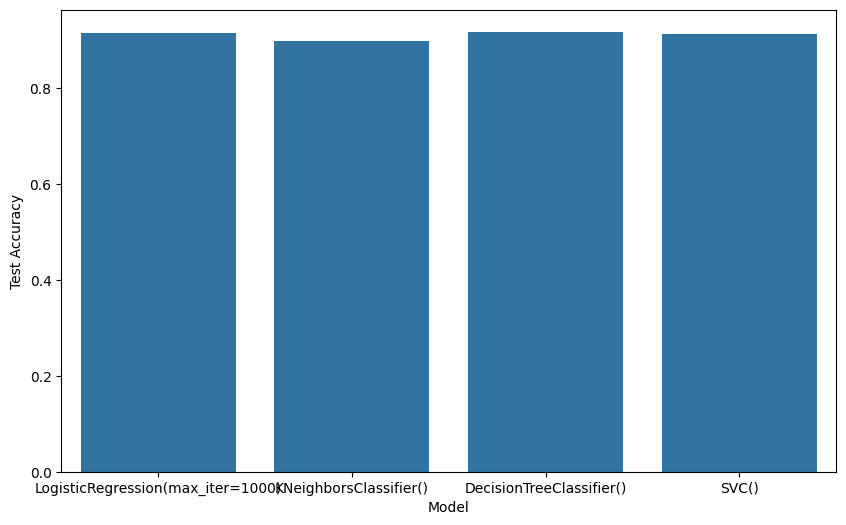

In [31]:
# Plot graph between model and test accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=result_df)

In [32]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

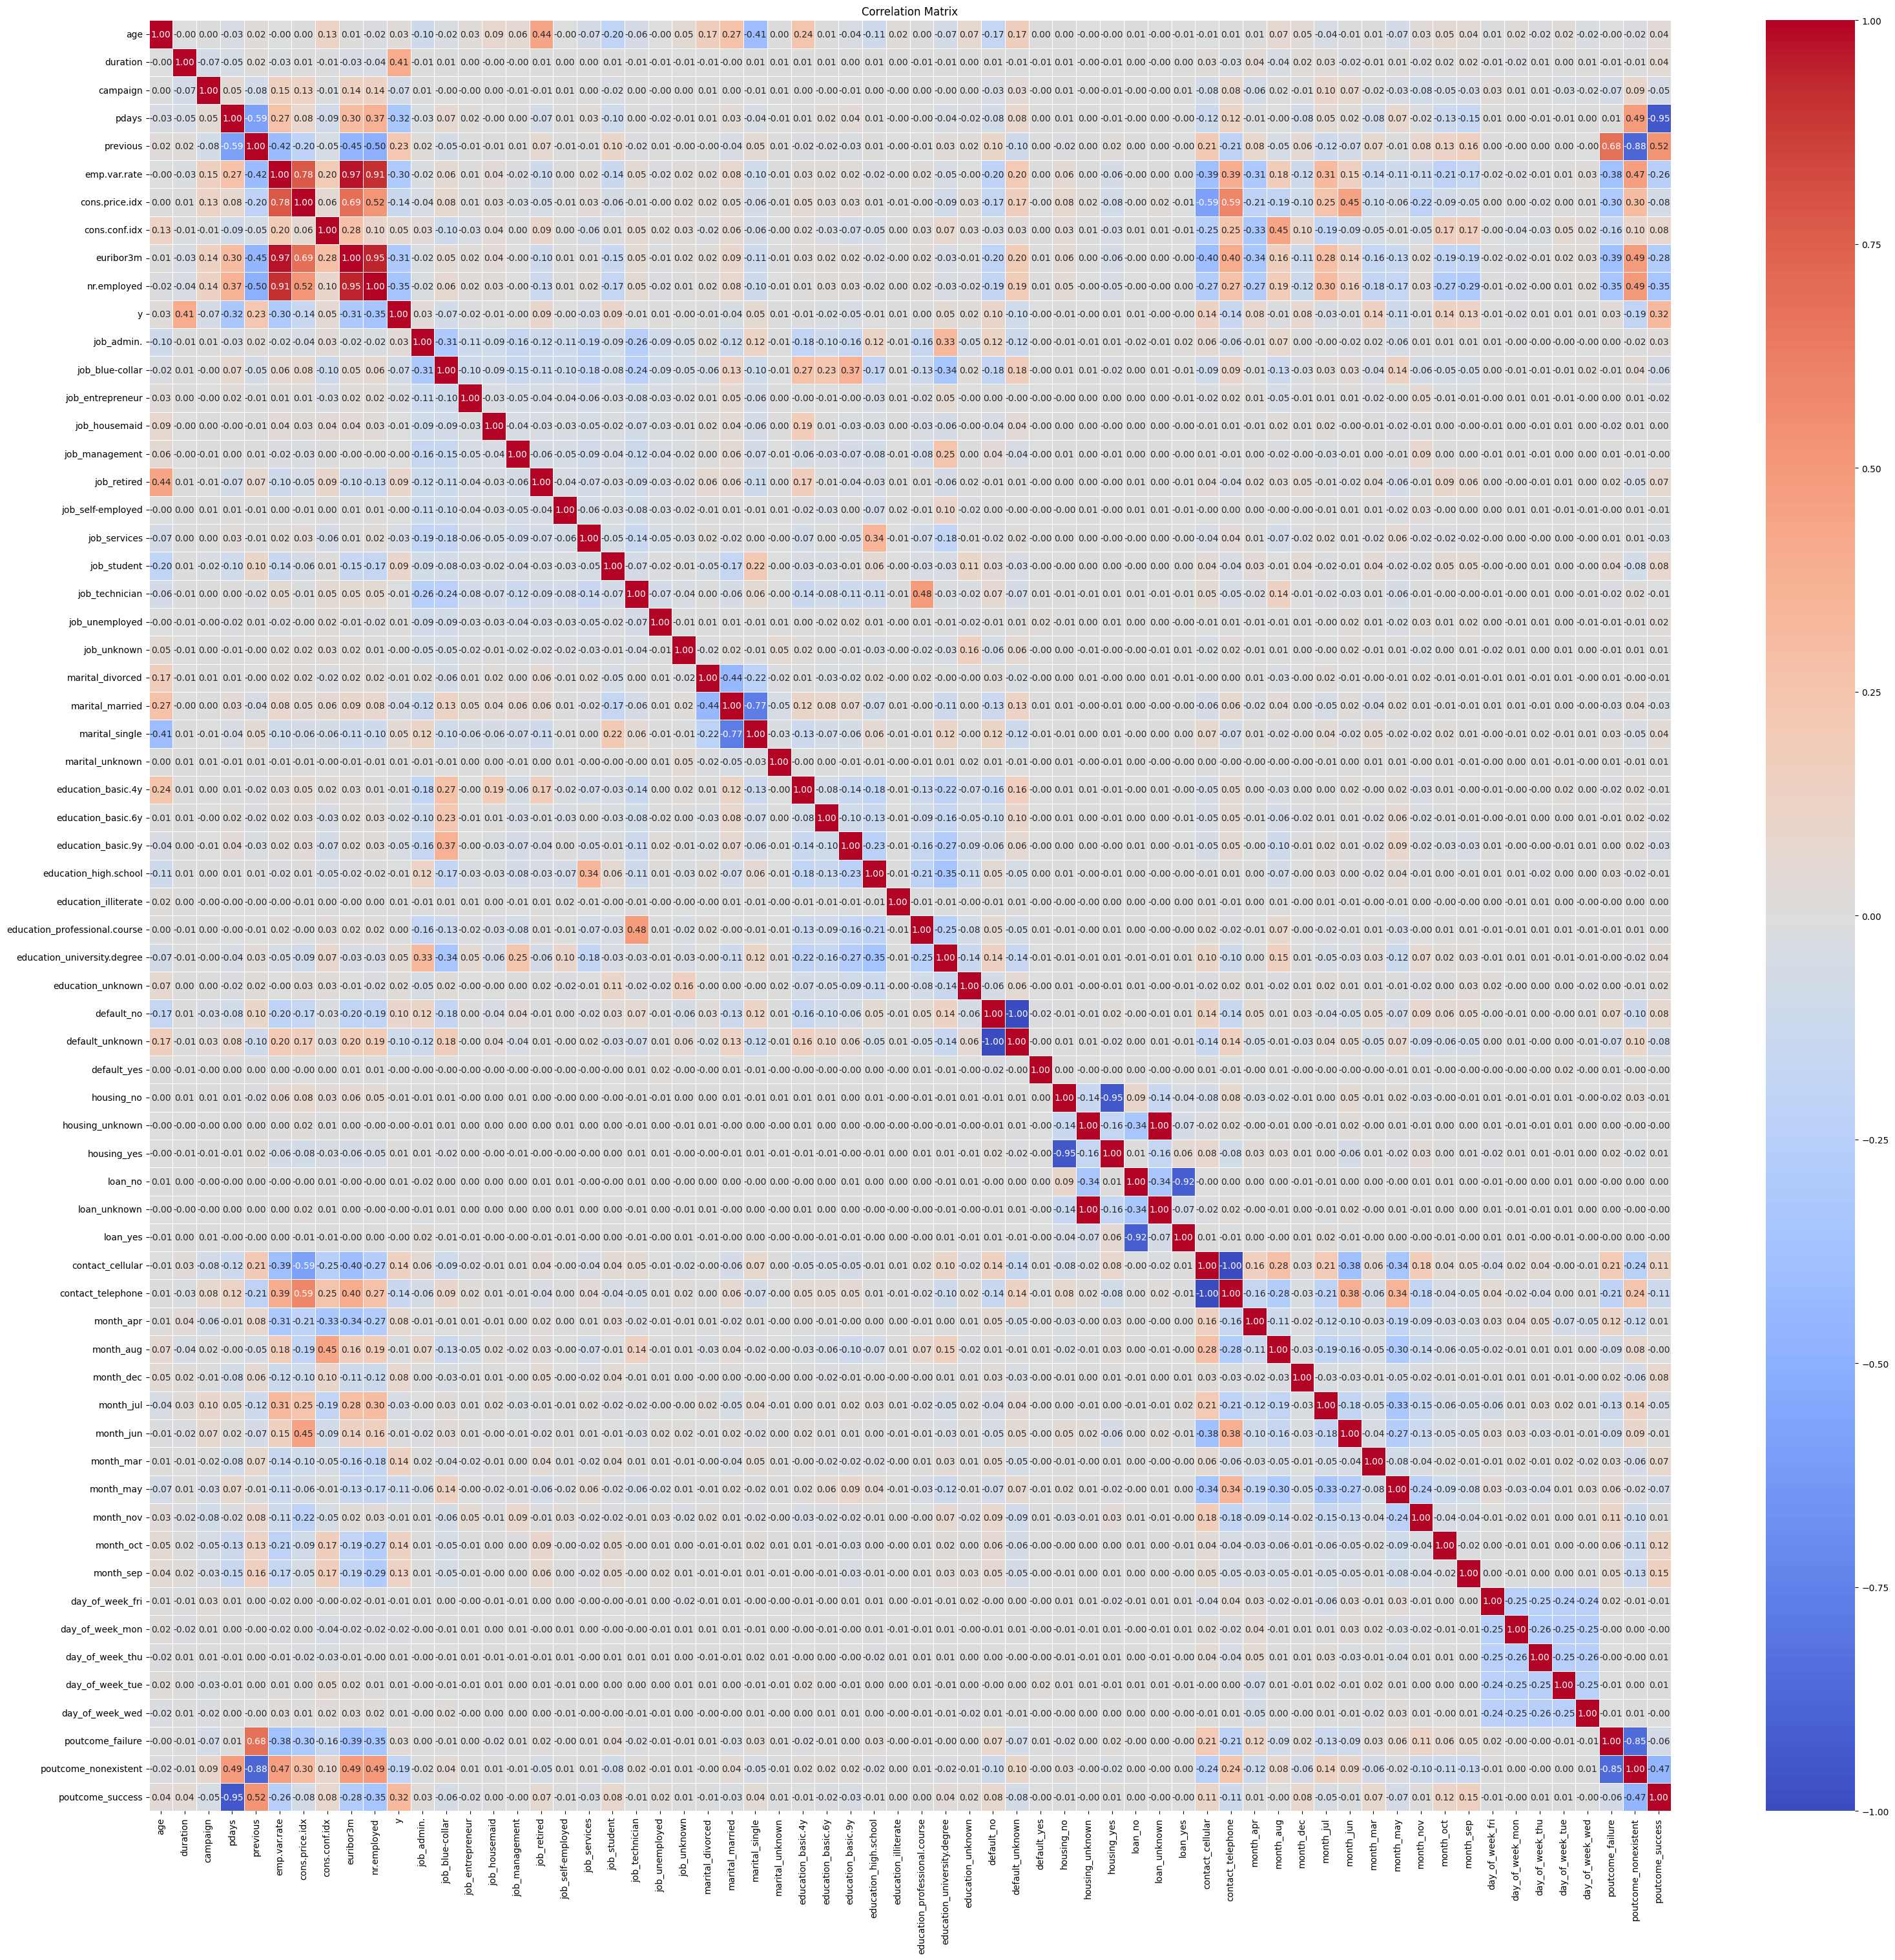

In [33]:
# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(38, 36))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()


# Key Insights / Business recommendations :
* Positive Influencers:
  Variables such as duration, cons.price.idx, euribor3m, contact_cellular, and poutcome_success have a positive relationship with the dependent variable, suggesting that these factors increase the likelihood of success.
* Negative Influencers: Features like emp.var.rate, month_may, pdays, contact_telephone, and default_yes have a negative relationship with the dependent variable, implying that these factors are associated with a lower likelihood of success.
* Employment variation rate increases, the probability of the positive outcome decreases
* Increase in the consumer price index leads to an Increase subscription
* The duration has a strong positive effect, meaning the longer the duration of contact, the more likely it is that the outcome will be positive
* The number of employees is positively correlated with the outcome.
* Months August,March increases the likelihood of positive outcome
* The month May is negatively correlated with the outcome.
* The number of days since the last contact (pdays) negatively influences the outcome
* The default_yes feature, indicating whether the client has credit in default, negatively impacts the outcome.

##### Questions